# Basics of cluster analysis

K-means clustering: ("k" stands for the number of clusters)
1. choose the number of clusters
2. specify the cluster seeds (a seed is basically a starting centroid)
3. assign each point to a centroid (signed based on proximity, Euclidian distance)
4. adjust the centroids -> Go back to step 3 and recalculate the position of the centroid with the points.

## Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [3]:
path='C:/Users/Mendes/Desktop/The Data Science Course 2021 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S38_L255/'
data = pd.read_csv(path+'3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

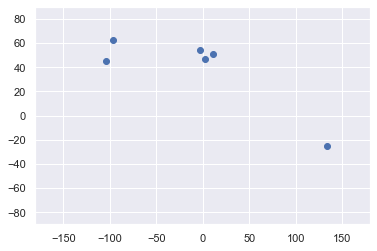

In [4]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

In [5]:
x=data.iloc[:,1:3]  #slices
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [6]:
kmeans=KMeans(3)  #the value in brackets is K
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [7]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [8]:
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


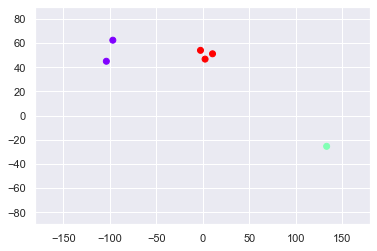

In [9]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Map the data

In [10]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})   #This is not the optimal way to encode them, but it will work for now
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [12]:
x=data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


## Clustering

In [13]:
kmeans=KMeans(3)  #the value in brackets is K
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [14]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 0, 2, 0])

In [15]:
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


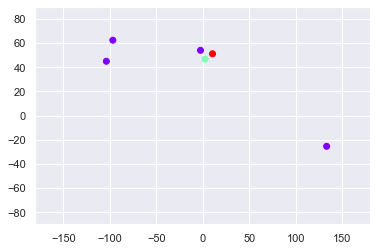

In [16]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

In [18]:
kmeans.inertia_

0.0

In [20]:
wcss=[]
for i in range(1,7):
 kmeans=KMeans(i)
 kmeans.fit(x)
 wcss_iter  = kmeans.inertia_
 wcss.append(wcss_iter)

C:\Users\Mendes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
C:\Users\Mendes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
C:\Users\Mendes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


In [21]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

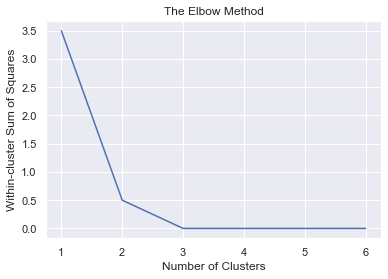

In [22]:
number_clusters=range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

A two cluster solution would be suboptimal as the leap from 2 to 3 is very big. 3 is the optimal number.